# Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
### Emile GERNIGON 21104860
### 5 mars 2025

## Partie I

1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres
N = 50
tau = 0.5

# Définition de la suite tn
def t(n):
    ''' Retourne l'élément tn de la suite '''
    return n+tau*np.sqrt(n)

# Liste puis tableau des éléments
liste = [t(k) for k in range(N)]
tn = np.array(liste)

[ 0.          1.5         2.70710678  3.8660254   5.          6.11803399
  7.22474487  8.32287566  9.41421356 10.5        11.58113883 12.6583124
 13.73205081 14.80277564 15.87082869 16.93649167 18.         19.06155281
 20.12132034 21.17944947 22.23606798 23.29128785 24.34520788 25.39791576
 26.44948974 27.5        28.54950976 29.59807621 30.64575131 31.6925824
 32.73861279 33.78388218 34.82842712 35.87228132 36.91547595 37.95803989
 39.         40.04138127 41.082207   42.122499   43.16227766 44.20156212
 45.24037035 46.27871926 47.31662479 48.35410197 49.39116499 50.4278273
 51.46410162 52.5       ]


2.

In [8]:
# Vérification avec booléens
tn[1] == 1.5
tn[4] == 5
tn[9] == 10.5
tn[16] == 18
tn[25] == 27.5

True

3.

In [34]:
# Tableaux du temps et paramètres 

t1 = np.arange(tn[2]-1, tn[2], 0.01) # de t2-1 à t2
t2 = np.arange(tn[4]-1, tn[4], 0.01) # de t4-1 à t4
n = np.linspace(0,50, 51)

# Tableaux de sorties (vitesses)
v_x = np.empty(t1.shape)
v_y = np.empty(t1.shape)


# Remplissage des tableaux de vitesses avec le calcul

def vx(t, tn, n) :
    for k in range(len(t)) :
        for i in range(len(tn)-1) :
            for j in range(len(n)) :
                v_x[k] = ((-1)**j)*np.sqrt(j+1)*np.sin(np.pi*(t[k]-tn[i+1]))
    return v_x

def vy(t, tn, n) :
    for k in range(len(t)) :
        for i in range(len(tn)-1) :
            for j in range(len(n)) :
                v_y[k] = (-(-1)**j)*np.sqrt(j+1)*np.cos(np.pi*(t[k]-tn[i+1]))
    return v_y

4.

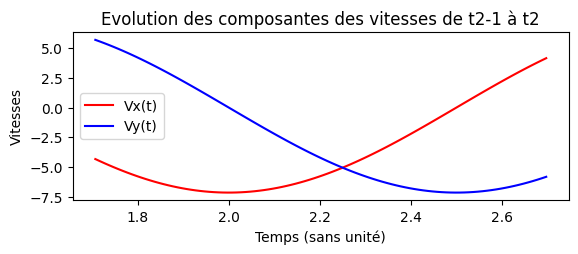

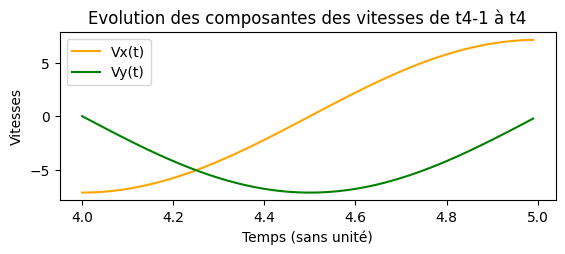

In [35]:
# Représentation graphique pour t allant de t2-1 à t2

plt.subplot(2,1,1)
plt.plot(t1, vx(t1, tn, n), color = 'r', label = 'Vx(t)')
plt.plot(t1, vy(t1, tn, n), color = 'b', label = 'Vy(t)')
plt.xlabel('Temps (sans unité)')
plt.ylabel('Vitesses')
plt.title('Evolution des composantes des vitesses de t2-1 à t2')
plt.legend()
plt.show()

# Représentation graphique pour t allant de t4-1 à t4

plt.subplot(2,1,2)
plt.plot(t2, vx(t2, tn, n), color = 'orange', label = 'Vx(t)')
plt.plot(t2, vy(t2, tn, n), color = 'g', label = 'Vy(t)')
plt.xlabel('Temps (sans unité)')
plt.ylabel('Vitesses')
plt.title('Evolution des composantes des vitesses de t4-1 à t4')
plt.legend()
plt.show()

5.

In [38]:
# On cherche d'abord les maxima de vx et vy entre t2-1 et t2
vx_max1 = np.max(vx(t1,tn,n))
vy_max1 = np.max(vy(t1,tn,n))

# Puis on trouve leur indice 
ind1 = np.argmax(vx(t1,tn,n))
ind2 = np.argmax(vy(t1,tn,n))

# Pour enfin trouver les temps correspondants
tmax1 = t[ind1]
tmax2 = t[ind2]

# Même processus entre t4-1 et t4

# On cherche d'abord les maxima de vx et vy entre t2-1 et t2
vx_max2 = np.max(vx(t2,tn,n))
vy_max2 = np.max(vy(t2,tn,n))

# Puis on trouve leur indice 
ind3 = np.argmax(vx(t2,tn,n))
ind4 = np.argmax(vy(t2,tn,n))

# Pour enfin trouver les temps correspondants
tmax3 = t[ind3]
tmax4 = t[ind4]

print(vx_max1)
print(vy_max1)
print(vx_max2)
print(vy_max2)

4.144939786858925
5.682386050072289
7.137904564710907
-8.047395390820977e-14


On voit sur les graphiques et avec la confirmation des valeurs qu'en effet, les valeurs maximales sont au bord lorsque l'on prend des intervalles de temps entre $t_{n+1}-1$ et $t_{n+1}$. On en déduit que les particules ont leur vitesse maximale lorsqu'elles repartent du D dans lequel elles sont, ayant été accélerées dans le D.

## Partie II

6.

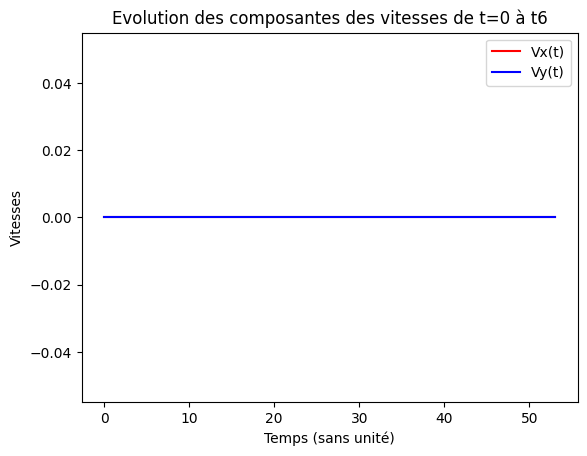

In [44]:
# Il nous faut maintenant de nouvelles fonctions pour les temps de tn à tn+1-1
vx_ = np.empty(t.shape)
vy_ = np.empty(t.shape)
t = np.linspace(0,53,vx_.size)
def vx_total(t, tn, n) :
    for i in range(len(tn)-1) :
        if tn[i]<t[i]<tn[i+1]-1 :
            for k in range(len(t)) :
                vx_[k] = 0
                for i in range(len(tn)) :
                    for j in range(len(n)) : 
                        vy_[k] = ((-1)**j)*(np.sqrt(j)+(t[k]-tn[i])/tau)
        elif tn[i+1]-1<t[i]<tn[i+1] :
            vx_ = vx(t, tn, n)
            vy_ = vy(t, tn, n)

plt.plot(t, vx_, color = 'r', label = 'Vx(t)')
plt.plot(t, vy_, color = 'b', label = 'Vy(t)')
plt.xlabel('Temps (sans unité)')
plt.ylabel('Vitesses')
plt.title('Evolution des composantes des vitesses de t=0 à t6')
plt.legend()
plt.show()